# **Info**

**Dataset**
* Mercedes Benz Greener Manufacturing Dataset
* https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing

**Medium Article**
* https://medium.com/analytics-vidhya/mercedes-benz-greener-manufacturing-eed66a52403 
* https://github.com/tankmitesh/Mercedes-Benz-Greener-Manufacturing-case-study?source=post_page-----eed66a52403--------------------------------

# **Setup**

In [89]:
!python3 --version

from psutil import *
print(f'CPU Cores: {cpu_count()}')
print(f'System Memory: {virtual_memory()[0]/(1024**3)} GB')

Python 3.11.4
CPU Cores: 8
System Memory: 8.0 GB


In [90]:
import os 
from zipfile import ZipFile
from IPython.display import clear_output
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

In [91]:
# Get Current Directory
os.getcwd()

'/Users/akshayyewle/Library/CloudStorage/OneDrive-Personal/06 Data Science & Analytics/Github/Machine-Learning/01 Mercedes Benz Greener Manufacturing'

In [92]:
# Check Working Directory
os.getcwd()

'/Users/akshayyewle/Library/CloudStorage/OneDrive-Personal/06 Data Science & Analytics/Github/Machine-Learning/01 Mercedes Benz Greener Manufacturing'

# **Data Extraction**

In [93]:
!kaggle competitions download -c mercedes-benz-greener-manufacturing

mercedes-benz-greener-manufacturing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [94]:
with ZipFile('mercedes-benz-greener-manufacturing.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()
    print('No. Of Files In Zip File: ',len(list_of_files),'\n')
    print(list_of_files)

No. Of Files In Zip File:  3 

['sample_submission.csv.zip', 'test.csv.zip', 'train.csv.zip']


In [95]:
# Extract Zip File Contents In Main Directory
with ZipFile('mercedes-benz-greener-manufacturing.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

In [96]:
# Extract Zip File Contents In Main Directory
with ZipFile('train.csv.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

In [97]:
# Extract Zip File Contents In Main Directory
with ZipFile('test.csv.zip','r') as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

# **Data Import**

## **Training Data**

In [98]:
train = pd.read_csv('train.csv')

print('Data Shape: ',train.shape)
train.columns

Data Shape:  (4209, 378)


Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [99]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [101]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Testing Data**

In [102]:
test = pd.read_csv('test.csv')

print('Data Shape: ',test.shape)
test.columns

Data Shape:  (4209, 377)


Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

# **Data Exploration**

In [ ]:
# Check Duplicated Columns
print('Duplicated Columns In Train Data: ',sum(train.columns.duplicated()))
print('Duplicated Columns In Test Data: ',sum(test.columns.duplicated()))

Duplicated Columns In Train Data:  0
Duplicated Columns In Test Data:  0


In [ ]:
# Check Duplicated Rows
print('Duplicated Rows In Train Data: ',sum(train.duplicated()))
print('Duplicated Rows In Test Data: ',sum(test.duplicated()))

Duplicated Rows In Train Data:  0
Duplicated Rows In Test Data:  0


In [ ]:
# No. Of Categorical & Numeric Features
print('No. Of Numeric Features: ',len(train.select_dtypes('number').columns))
print('No. Of Categoric Features: ',len(train.select_dtypes('object').columns))

No. Of Numeric Features:  370
No. Of Categoric Features:  8


## **Target Variable**

### **Histogram - Testing Time**

In [108]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

<Axes: >

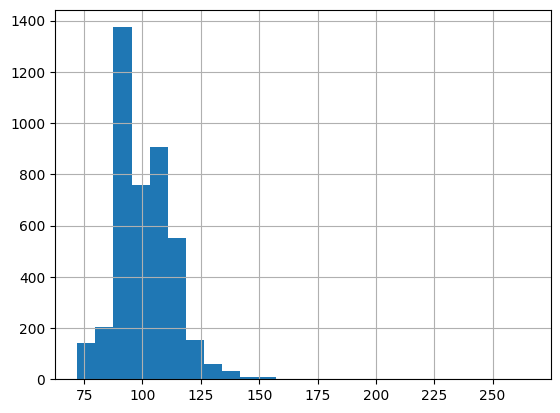

In [109]:
# Histogram of Testing Time
train['y'].hist(bins=25)

In [110]:
# Skew & Kurtosis
print('Skewness Testing Time: ', train['y'].skew())
print('Kurtosis Testing Time: ', train['y'].kurt())

Skewness Testing Time:  1.206525852242492
Kurtosis Testing Time:  7.910712683715831


Skewness y target: 1.206526
Kurtosis y target: 7.910713


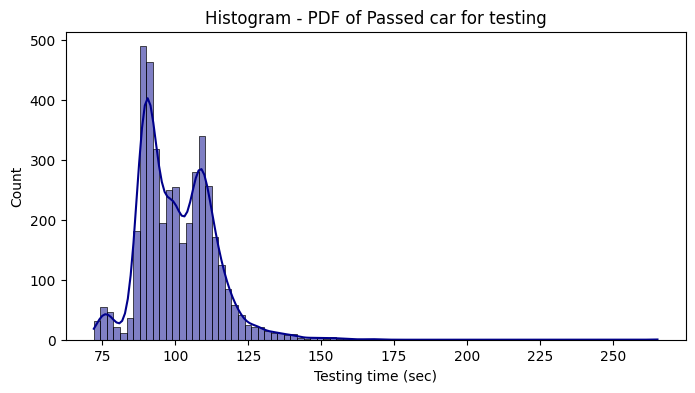

In [111]:
#skewness and kurtosis
print("Skewness y target: %f" % train['y'].skew())
print("Kurtosis y target: %f" % train['y'].kurt())
      
# plot size
plt.figure(figsize = (8,4))
      
# seaborn histogram
sns.histplot(train['y'], kde=True, 
              color = 'Darkblue')

# Add label and title
plt.title('Histogram - PDF of Passed car for testing')
plt.xlabel('Testing time (sec)')
plt.show()

In [112]:
# Distribution is highly skewed
# Since Kurtosis is not equal to 3, the distribution is not normal.

### **Box Plot - Testing Time**

<Axes: xlabel='y'>

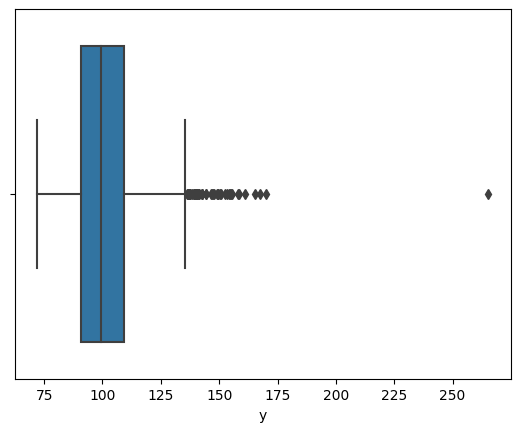

In [113]:
sns.boxplot(train,x='y')

## **NUM Features**

### **Data Values**

In [138]:
for feature in train.select_dtypes('number').columns:
    print(f'Feature Name: {feature}','\n',train[feature].unique(),'\n')
    

Feature Name: ID 
 [   0    6    7 ... 8412 8415 8417] 

Feature Name: y 
 [130.81  88.53  76.26 ...  85.71 108.77  87.48] 

Feature Name: X10 
 [0 1] 

Feature Name: X11 
 [0] 

Feature Name: X12 
 [0 1] 

Feature Name: X13 
 [1 0] 

Feature Name: X14 
 [0 1] 

Feature Name: X15 
 [0 1] 

Feature Name: X16 
 [0 1] 

Feature Name: X17 
 [0 1] 

Feature Name: X18 
 [1 0] 

Feature Name: X19 
 [0 1] 

Feature Name: X20 
 [0 1] 

Feature Name: X21 
 [1 0] 

Feature Name: X22 
 [0 1] 

Feature Name: X23 
 [0 1] 

Feature Name: X24 
 [0 1] 

Feature Name: X26 
 [0 1] 

Feature Name: X27 
 [0 1] 

Feature Name: X28 
 [0 1] 

Feature Name: X29 
 [0 1] 

Feature Name: X30 
 [0 1] 

Feature Name: X31 
 [1 0] 

Feature Name: X32 
 [0 1] 

Feature Name: X33 
 [0 1] 

Feature Name: X34 
 [0 1] 

Feature Name: X35 
 [1 0] 

Feature Name: X36 
 [0 1] 

Feature Name: X37 
 [1 0] 

Feature Name: X38 
 [0 1] 

Feature Name: X39 
 [0 1] 

Feature Name: X40 
 [0 1] 

Feature Name: X41 
 [0 1] 

Feature N

### **Corr Matrix**

<Axes: >

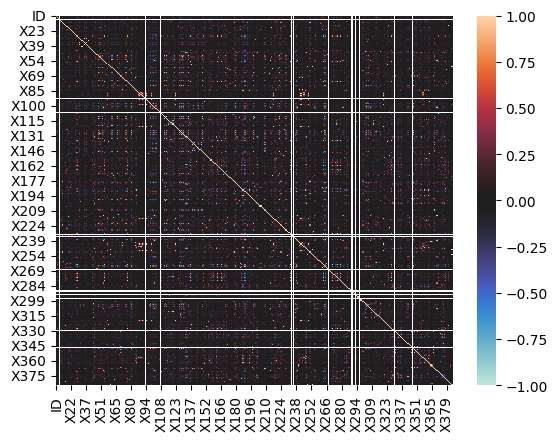

In [114]:
sns.heatmap(train.select_dtypes(include='number').corr(),vmin=-1,vmax=1,center=0)

## **CAT Features**

In [115]:
len(train.select_dtypes('object').columns)

8

In [ ]:
# Check Categoric Features
train.select_dtypes(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [116]:
print('No. Of CAT Features: ',len(train.select_dtypes('object').columns))
print('CAT Features: ','\n',train.select_dtypes('object').columns)

No. Of CAT Features:  8
CAT Features:  
 Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')


### **Bar Plot**

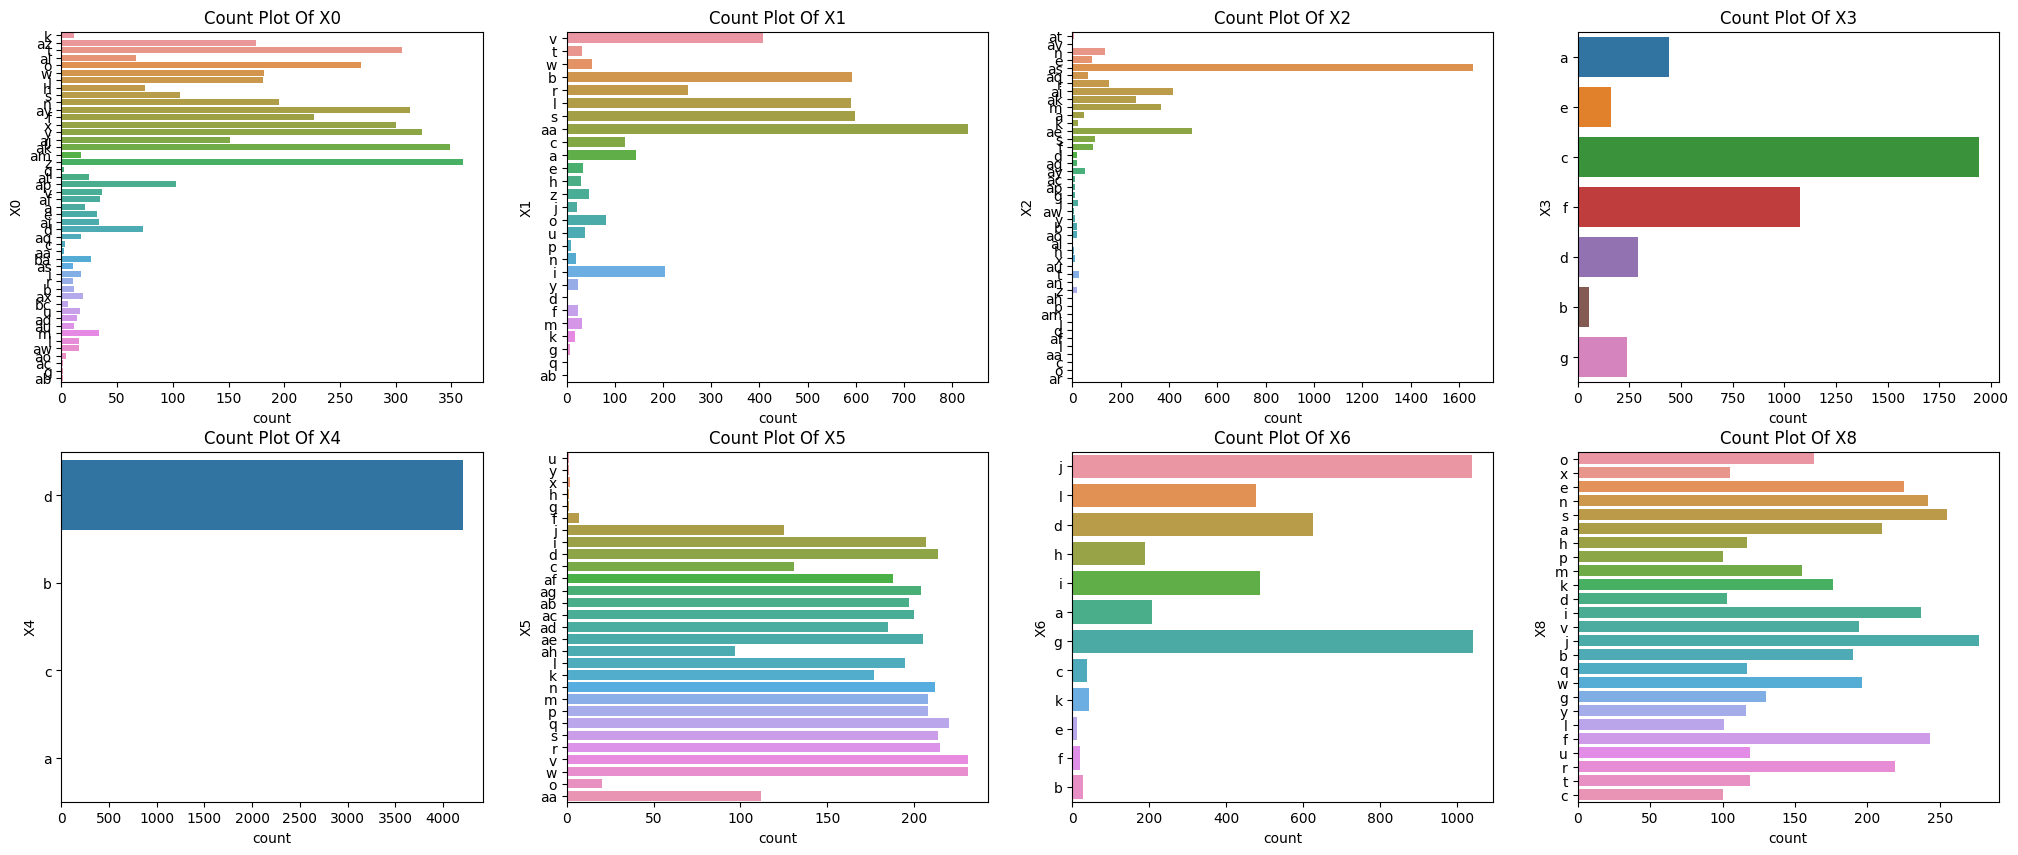

In [117]:
fig, ax = plt.subplots(2,4,figsize=(25,10))
axes = ax.flatten()

for ax, feature in zip(axes,train.select_dtypes('object')):
    sns.countplot(data=train,y=feature,ax=ax)
    ax.set_title(f'Count Plot Of {feature}')
plt.show()

In [118]:
# Confirm The Value Counts Of X4 Column
train['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

### **Scatter Plot**

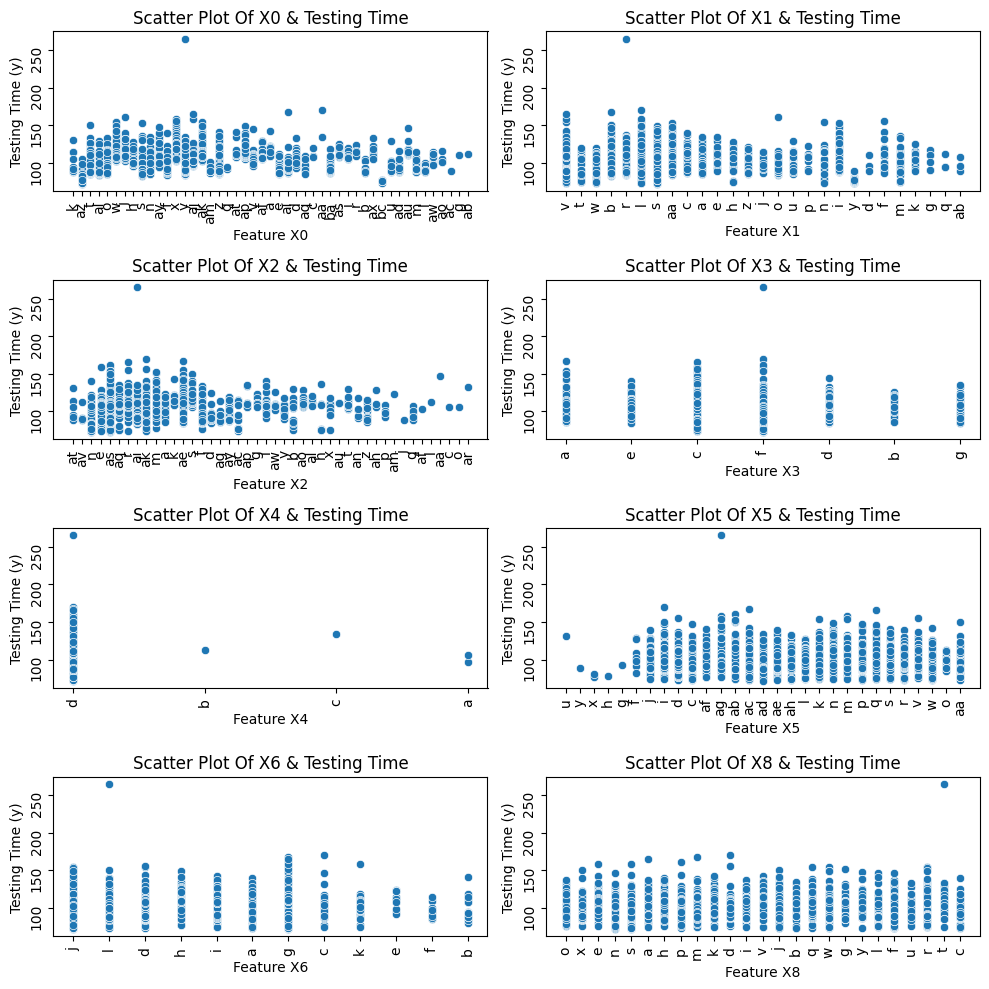

In [119]:
# Create Scatter Plot For All Categoric Features
fig, axes = plt.subplots(4,2,figsize=(10,10))

for ax,feature in zip(axes.flatten(),train.select_dtypes('object').columns):
    sns.scatterplot(data=train,x=train[feature],y=train['y'],ax=ax)
    ax.set_title(f'Scatter Plot Of {feature} & Testing Time')
    ax.set_xlabel(f'Feature {feature}')
    ax.set_ylabel('Testing Time (y)')
    ax.tick_params(labelrotation=90)
plt.tight_layout()
plt.show()

### **Box Plot**

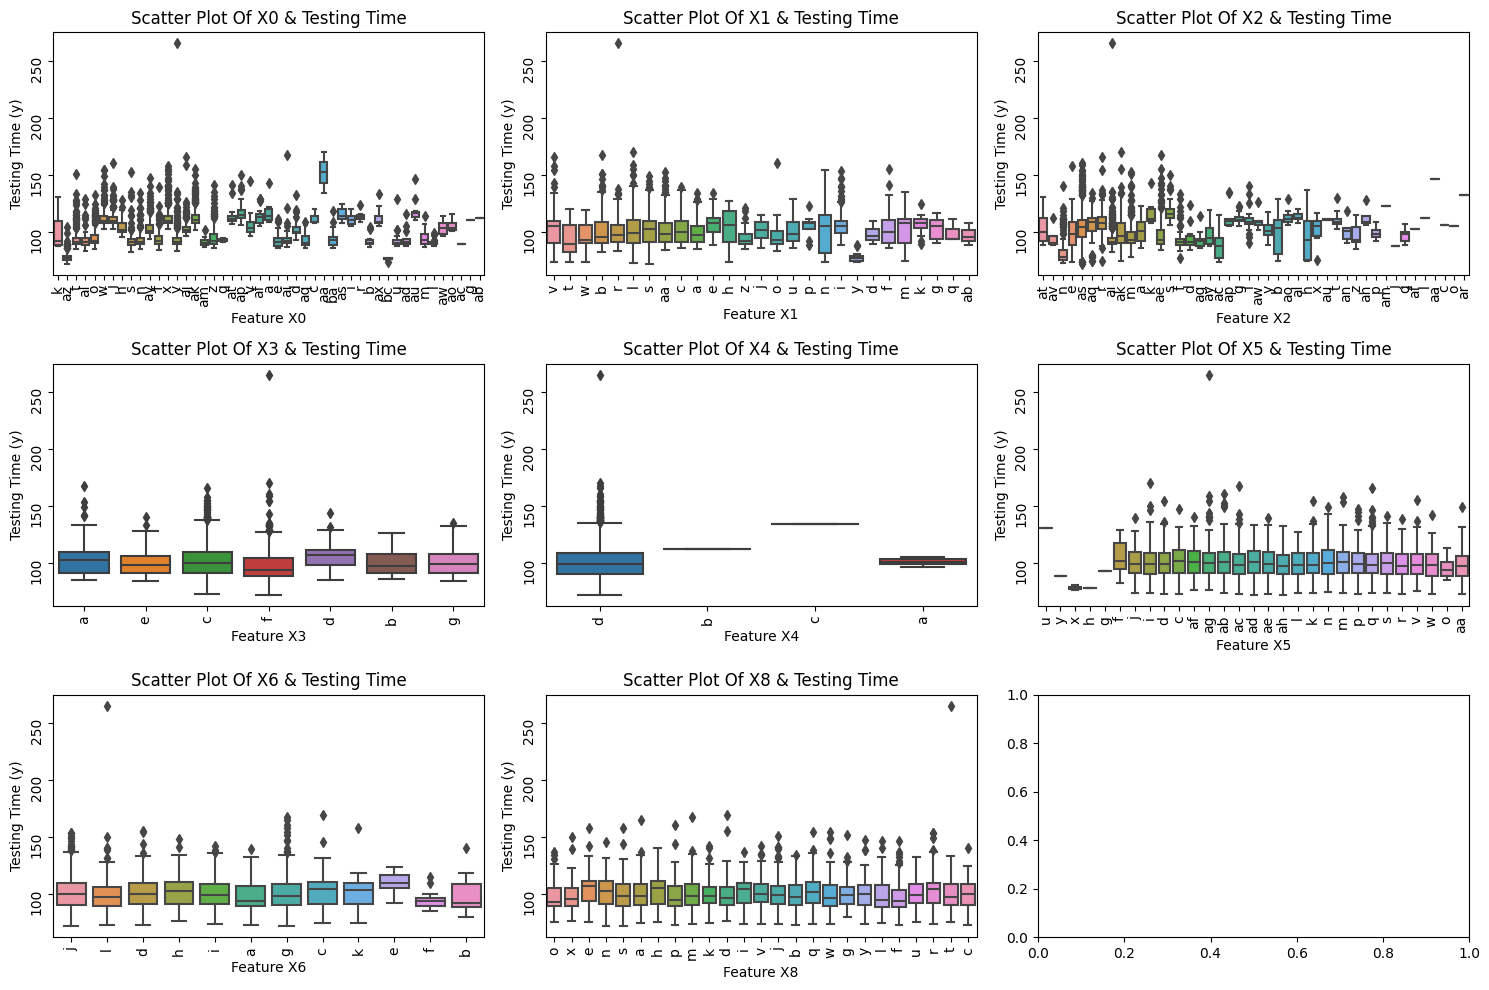

In [120]:
# Create Scatter Plot For All Categoric Features
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax,feature in zip(axes.flatten(),train.select_dtypes('object').columns):
    sns.boxplot(data=train,x=train[feature],y=train['y'],ax=ax)
    ax.set_title(f'Scatter Plot Of {feature} & Testing Time')
    ax.set_xlabel(f'Feature {feature}')
    ax.set_ylabel('Testing Time (y)')
    ax.tick_params(labelrotation=90)
plt.tight_layout()
plt.show()

# **Data Copy**

In [121]:
train_final = train.copy(deep=True)

print(f'Dataframe Shape: {train_final.shape}')

Dataframe Shape: (4209, 378)


In [122]:
# Check Categoric Features
print('No. Of Categoric Features: ',train_final.select_dtypes('object').shape[1])
train_final.select_dtypes('object').columns

No. Of Categoric Features:  8


Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [123]:
# Check Categoric Features
print('No. Of Categoric Features: ',train_final.select_dtypes('number').shape[1])
train_final.select_dtypes('number').columns

No. Of Categoric Features:  370


Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)

# **Data Review & Split**

## **Data Cleaning**

In [124]:
print('Data Shape Before Feature Removal: ',train_final.shape)

# Remove ID Column
train_final.drop(['ID'],axis=1,inplace=True)
print('Data Shape After Feature Removal: ',train_final.shape)

Data Shape Before Feature Removal:  (4209, 378)
Data Shape After Feature Removal:  (4209, 377)


## **Predictor & Target Split**

In [125]:
x_train = train_final.drop('y',axis=1)
y_train = train_final['y']

## **Feature Types**

In [130]:
x_train.dtypes.value_counts()

int64     368
object      8
dtype: int64

## **Split CAT Features**

In [127]:
x_train_CAT = x_train.select_dtypes('object')

print('Shape: ',x_train_CAT.shape)
x_train_CAT.head()

Shape:  (4209, 8)


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


## **Split NUM Features**

In [128]:
x_train_NUM = x_train.select_dtypes('number')

print('Shape: ',x_train_NUM.shape)
x_train_NUM.head()

Shape:  (4209, 368)


,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Feature Transformation**

## **Encoding**

In [39]:
# Data Size Before Feature Encoding
x_train_CAT.shape

(4209, 378)

In [40]:
from sklearn.preprocessing import OneHotEncoder
Feature_Transformer_01 = OneHotEncoder(sparse_output=False)

for feature in x_train_CAT.columns:
    print(f'Feature Name: {feature}')
    Feature_Transformer_01.fit(x_train_CAT[[feature]])

    Enc_Cols = list(Feature_Transformer_01.categories_[0])
    print('No Of Categories In Feature: ',len(Enc_Cols))
    print('Encoded Categories: ',Enc_Cols)

    # Rename Category Names
    Enc_Cols_Renamed = [ (f'{feature}_'+col) for col in Enc_Cols]
    print('Renamed Categories: ',Enc_Cols_Renamed)

    Enc_Dataframe = pd.DataFrame(Feature_Transformer_01.transform(x_train_CAT[[feature]]),
                                 columns=Enc_Cols_Renamed)
    # print(Enc_Dataframe.head())

    # Concatenate Encoded Columns To Main Data
    x_train_CAT = pd.concat(objs=[x_train_CAT,Enc_Dataframe],axis=1,)
    print('Current Data Size: ',x_train_CAT.shape,'\n')

Feature Name: X0
No Of Categories In Feature:  47
Encoded Categories:  ['a', 'aa', 'ab', 'ac', 'ad', 'af', 'ai', 'aj', 'ak', 'al', 'am', 'ao', 'ap', 'aq', 'as', 'at', 'au', 'aw', 'ax', 'ay', 'az', 'b', 'ba', 'bc', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Renamed Categories:  ['X0_a', 'X0_aa', 'X0_ab', 'X0_ac', 'X0_ad', 'X0_af', 'X0_ai', 'X0_aj', 'X0_ak', 'X0_al', 'X0_am', 'X0_ao', 'X0_ap', 'X0_aq', 'X0_as', 'X0_at', 'X0_au', 'X0_aw', 'X0_ax', 'X0_ay', 'X0_az', 'X0_b', 'X0_ba', 'X0_bc', 'X0_c', 'X0_d', 'X0_e', 'X0_f', 'X0_g', 'X0_h', 'X0_i', 'X0_j', 'X0_k', 'X0_l', 'X0_m', 'X0_n', 'X0_o', 'X0_q', 'X0_r', 'X0_s', 'X0_t', 'X0_u', 'X0_v', 'X0_w', 'X0_x', 'X0_y', 'X0_z']
Current Data Size:  (4209, 425) 

Feature Name: X1
No Of Categories In Feature:  27
Encoded Categories:  ['a', 'aa', 'ab', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z']
Renamed 

In [136]:
# Data Size After Feature Encoding
x_train_CAT.shape

(4209, 8)

In [137]:
# Check CAT Features
x_train_CAT.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

## **Scaling**

In [133]:
x_train_NUM.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.preprocessing import MinMaxScaler
Feature_Transformer_02 = MinMaxScaler()

x_train_NUM = pd.DataFrame(Feature_Transformer_02.fit_transform(x_train_NUM),
                              columns=Feature_Transformer_02.feature_names_in_,
                              index = x_train_NUM.index)

print(x_train_NUM.shape)
x_train_NUM.head()

(4209, 368)


,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Feature Selection**

## **Feature Selection - Categoric**

In [44]:
# Identify Categoric Features
train_final.select_dtypes('category').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

### **Based On Chi2 Test**

In [34]:
from sklearn.feature_selection import chi2

Chi2_Test_Summary_Features = train.select_dtypes('category').columns
Chi2_Test_Summary_Score = chi2(train.select_dtypes('category'),train['y'])[0]
Chi2_Test_Summary_P_Value = chi2(train.select_dtypes('category'),train['y'])[1]

Chi2_Test_Summary = pd.DataFrame({'Features':Chi2_Test_Summary_Features,'Chi_Score':Chi2_Test_Summary_Score,
                                'P_Value':Chi2_Test_Summary_P_Value}).sort_values('Chi_Score',ascending=False)
Chi2_Test_Summary

ValueError: could not convert string to float: 'k'

## **Feature Selection - Numeric**

### **Features With Highest Correlation**

In [ ]:
Feature_Corr_Table = train_final.select_dtypes('number').corr().loc[:,['y']].reset_index().sort_values('y',ascending=False)
Feature_Corr_Table.rename(columns={'index':'Feature','y':'Target_Correlation'},inplace=True)
Feature_Corr_Table['Abs_Target_Correlation'] = Feature_Corr_Table['Target_Correlation'].apply(lambda x: abs(x))
Feature_Corr_Table.sort_values('Abs_Target_Correlation',ascending=False,inplace=True)
Feature_Corr_Table.drop(Feature_Corr_Table[Feature_Corr_Table['Feature']=='y'].index,axis=0,inplace=True)
print(Feature_Corr_Table.shape)

(369, 3)


In [ ]:
Feature_Corr_Table.isna().sum()

Feature                    0
Target_Correlation        12
Abs_Target_Correlation    12
dtype: int64

In [ ]:
Feature_Corr_Table.dropna(axis=0)

,Feature,Target_Correlation,Abs_Target_Correlation
299,X314,0.606005,0.606005
247,X261,0.588785,0.588785
116,X127,-0.510620,0.510620
249,X263,0.379629,0.379629
20,X29,-0.379629,0.379629
...,...,...,...
350,X365,0.001008,0.001008
163,X175,0.000973,0.000973
31,X40,-0.000918,0.000918
280,X294,0.000525,0.000525


In [ ]:
Feature_Corr_Table['Abs_Target_Correlation'].describe()

count    357.000000
mean       0.090088
std        0.097808
min        0.000239
25%        0.022983
50%        0.051200
75%        0.124188
max        0.606005
Name: Abs_Target_Correlation, dtype: float64

In [ ]:
# Features With Target_Correlation > Q3 Value
Feature_Corr_Table[Feature_Corr_Table['Abs_Target_Correlation'] > Feature_Corr_Table['Abs_Target_Correlation'].describe()['75%']]

,Feature,Target_Correlation,Abs_Target_Correlation
299,X314,0.606005,0.606005
247,X261,0.588785,0.588785
116,X127,-0.510620,0.510620
249,X263,0.379629,0.379629
20,X29,-0.379629,0.379629
...,...,...,...
143,X155,0.129839,0.129839
215,X229,-0.128867,0.128867
214,X228,0.128797,0.128797
287,X301,-0.126139,0.126139


### **Based On Target Correlation**

In [ ]:
Features_To_Drop_01 = Feature_Corr_Table[Feature_Corr_Table['Abs_Target_Correlation'] < Feature_Corr_Table['Abs_Target_Correlation'].describe()['75%']]['Feature']

print(f'No. Of Features To Drop: {len(Features_To_Drop_01)}')

No. Of Features To Drop: 267


In [ ]:
print(f'Data Size Before Feature Removal: {train_final.shape}')
train_final.drop(labels=Features_To_Drop_01,axis=1,inplace=True)
print(f'Data Size After Feature Removal: {train_final.shape}')

Data Size Before Feature Removal: (4209, 378)
Data Size After Feature Removal: (4209, 111)


### **Based On Variance**

In [45]:
FS_Summary_02 = train.select_dtypes('number').var().reset_index()
FS_Summary_02.rename(columns={'index':'Features',0:'Variance'},inplace=True)
FS_Summary_02.sort_values('Variance',ascending=False,inplace=True)
FS_Summary_02

,Features,Variance
0,ID,5.941936e+06
1,y,1.607667e+02
116,X127,2.500357e-01
322,X337,2.497867e-01
347,X362,2.496467e-01
...,...,...
219,X233,0.000000e+00
83,X93,0.000000e+00
332,X347,0.000000e+00
254,X268,0.000000e+00


In [46]:
FS_Summary_02.head()

,Features,Variance
0,ID,5.941936e+06
1,y,1.607667e+02
116,X127,2.500357e-01
322,X337,2.497867e-01
347,X362,2.496467e-01


In [47]:
FS_Summary_02.tail()

,Features,Variance
219,X233,0.0
83,X93,0.0
332,X347,0.0
254,X268,0.0
283,X297,0.0


In [48]:
# Summary Of Feature Variance
FS_Summary_02['Variance'].describe()

count    3.700000e+02
mean     1.605978e+04
std      3.089065e+05
min      0.000000e+00
25%      4.023607e-03
50%      2.183952e-02
75%      8.946941e-02
max      5.941936e+06
Name: Variance, dtype: float64

### **Based On Pairwise Correlation**

### **Based On P-Value**

### **Correlation Plot**

# **Model Implementation**

## **01 - Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an instance of the model
model_01 = ElasticNet(
                    # alpha=0.25,
                    # selection='cyclic',
                    l1_ratio=0.5,
                    tol=0.001,
                    random_state=13
                    )
model_01_name = 'Elastic Net Regression'

# Sequential Feature Selector
Selector_11 = SequentialFeatureSelector(model_01,n_features_to_select='auto',
                             tol=0.0001,
                            #  direction='backward',   #['forward','backward']
                             scoring = 'r2',
                             n_jobs=-1)

Pipeline_11 = Pipeline([('Selector',Selector_11),('Model',model_01)])

# Define the hyperparameters to search over
Pipeline_11_Parameters = { 
                       'Selector__cv':[2,3,4,5],
                       'Selector__direction':['forward','backward'],
                       'Model__selection':['cyclic','random'],
                       'Model__alpha':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,1.85],
                       }

# Perform GridSearchCV to find the best hyperparameters
GridSearch_Model_01 = GridSearchCV(Pipeline_11, param_grid=Pipeline_11_Parameters)
GridSearch_Model_01.fit(x_train,y_train)

# Print the best hyperparameters and score
print("Best Hyper Parameters: ", GridSearch_Model_01.best_params_)
print("Best Score: ", GridSearch_Model_01.best_score_,'\n')

# Fit Selector & Model
Pipeline_11['Selector'].fit(x_train,y_train)
x_train_11 = Pipeline_11['Selector'].transform(x_train)
Pipeline_11['Model'].fit(x_train_11,y_train)

# Get the selected features
Selector_11_Output = Pipeline_11['Selector'].get_support()

# Print the selected features
Selected_Predictors_Model_01 = [x_train.columns.to_list()[i] for i in range(len(Selector_11_Output)) if Selector_11_Output[i]]

print('No. Of Predictors Selected: ',len(Selected_Predictors_Model_01))
print(Selected_Predictors_Model_01)

# Predict on the test data
y_pred_model_01 = GridSearch_Model_01.predict(x_test)

# Measure the error
model_01_RMSE = math.sqrt(mean_squared_error(y_test, y_pred_model_01))
model_01_MAE = mean_absolute_error(y_test, y_pred_model_01)
print('Root Mean Squared Error: {0:.2f}'.format(model_01_RMSE))
print('Mean Absolute Error: {0:.2f}'.format(model_01_MAE),'\n')

# Training Data R2 Score
model_01_train_pred = GridSearch_Model_01.predict(x_train)
model_01_train_R2Score = r2_score(y_train,model_01_train_pred)
print("Training Data R2 Score: {0:.4f}".format(model_01_train_R2Score))

# Testing Data R2 Score
model_01_test_R2Score = r2_score(y_test,y_pred_model_01)
print("Test Data R2 Score: {0:.4f}".format(model_01_test_R2Score))

# Testing Data Adjusted R2 Score
n_model_01 = x_test.shape[0]                                 # No Of Observations
print('No. Of Observations: ',n_model_01)
k_model_01 = len(Selected_Predictors_Model_01)               # No Of Predictors
print('No. Of Predictors: ',k_model_01)
model_01_test_adj_R2Score = 1 - ( (1-(model_01_test_R2Score ** 2)) * (n_model_01-1)/(n_model_01-k_model_01-1))
print("Test Data Adj R2 Score: {0:.4f}".format(model_01_test_adj_R2Score))

# **Result Summary**